In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6fb30e146ce48978787ba4314537e78c


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
lat_lngs

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | pedernales
Processing Record 5 of Set 1 | qunduz
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | lasa
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | okha
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | yar-sale
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | avera
Processing Record 20 of Set 1 | minot
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | samarai
Processing Record 23 of Set 1 | douglas
Processing Re

Processing Record 38 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 39 of Set 4 | almaznyy
Processing Record 40 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 41 of Set 4 | labutta
City not found. Skipping...
Processing Record 42 of Set 4 | camana
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | zhanaozen
Processing Record 45 of Set 4 | jinxiang
Processing Record 46 of Set 4 | bara
Processing Record 47 of Set 4 | pevek
Processing Record 48 of Set 4 | mikun
Processing Record 49 of Set 4 | da nang
Processing Record 50 of Set 4 | karaul
City not found. Skipping...
Processing Record 1 of Set 5 | exeter
Processing Record 2 of Set 5 | san vicente
Processing Record 3 of Set 5 | helong
Processing Record 4 of Set 5 | hualmay
Processing Record 5 of Set 5 | tura
Processing Record 6 of Set 5 | castro
Processing Record 7 of Set 5 | baruun-urt
Processing Record 8 of Set 5 | barrow
Processing Record 9 of Set 5 

Processing Record 32 of Set 8 | najran
Processing Record 33 of Set 8 | damghan
Processing Record 34 of Set 8 | berlin
Processing Record 35 of Set 8 | canavieiras
Processing Record 36 of Set 8 | port hardy
Processing Record 37 of Set 8 | palanga
Processing Record 38 of Set 8 | makarov
Processing Record 39 of Set 8 | uspenka
Processing Record 40 of Set 8 | boueni
Processing Record 41 of Set 8 | pangkalanbuun
Processing Record 42 of Set 8 | dicabisagan
Processing Record 43 of Set 8 | tuatapere
Processing Record 44 of Set 8 | college
Processing Record 45 of Set 8 | dujuma
City not found. Skipping...
Processing Record 46 of Set 8 | meulaboh
Processing Record 47 of Set 8 | lesnoye
Processing Record 48 of Set 8 | kedrovyy
Processing Record 49 of Set 8 | manaus
Processing Record 50 of Set 8 | launceston
Processing Record 1 of Set 9 | geraldton
Processing Record 2 of Set 9 | kemijarvi
Processing Record 3 of Set 9 | pascagoula
Processing Record 4 of Set 9 | labuhan
Processing Record 5 of Set 9 |

Processing Record 25 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 26 of Set 12 | kropotkin
Processing Record 27 of Set 12 | linjiang
Processing Record 28 of Set 12 | shu
Processing Record 29 of Set 12 | kutno
Processing Record 30 of Set 12 | baymak
Processing Record 31 of Set 12 | port blair
Processing Record 32 of Set 12 | srednekolymsk
Processing Record 33 of Set 12 | harper
Processing Record 34 of Set 12 | capreni
Processing Record 35 of Set 12 | nabire
Processing Record 36 of Set 12 | praia
Processing Record 37 of Set 12 | orgun
City not found. Skipping...
Processing Record 38 of Set 12 | olinda
Processing Record 39 of Set 12 | barawe
City not found. Skipping...
Processing Record 40 of Set 12 | vrangel
Processing Record 41 of Set 12 | takayama
Processing Record 42 of Set 12 | batagay
Processing Record 43 of Set 12 | sosnogorsk
Processing Record 44 of Set 12 | honningsvag
Processing Record 45 of Set 12 | sal rei
Processing Record 46 of Set 12 | barra patuca
Pr

In [8]:
len(city_data)

569

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.73,-155.09,80.60,78,90,3.36,US,2020-10-27 23:06:40
1,Punta Arenas,-53.15,-70.92,46.40,62,0,19.46,CL,2020-10-27 23:02:12
2,Vaini,-21.20,-175.20,77.00,78,20,12.75,TO,2020-10-27 23:06:40
3,Pedernales,18.04,-71.74,80.55,76,4,6.13,DO,2020-10-27 23:06:41
4,Qunduz,36.73,68.86,56.30,34,100,2.30,AF,2020-10-27 23:06:41
5,Souillac,-20.52,57.52,70.00,79,5,3.00,MU,2020-10-27 23:06:41
6,Albany,42.60,-73.97,48.99,66,100,2.10,US,2020-10-27 23:06:33
7,Qaanaaq,77.48,-69.36,10.65,80,93,13.00,GL,2020-10-27 23:06:41
8,Lasa,46.62,10.70,42.80,100,0,1.12,IT,2020-10-27 23:06:41
9,Hithadhoo,-0.60,73.08,83.66,66,96,10.18,MV,2020-10-27 23:06:41


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2020-10-27 23:06:40,19.73,-155.09,80.60,78,90,3.36
1,Punta Arenas,CL,2020-10-27 23:02:12,-53.15,-70.92,46.40,62,0,19.46
2,Vaini,TO,2020-10-27 23:06:40,-21.20,-175.20,77.00,78,20,12.75
3,Pedernales,DO,2020-10-27 23:06:41,18.04,-71.74,80.55,76,4,6.13
4,Qunduz,AF,2020-10-27 23:06:41,36.73,68.86,56.30,34,100,2.30
5,Souillac,MU,2020-10-27 23:06:41,-20.52,57.52,70.00,79,5,3.00
6,Albany,US,2020-10-27 23:06:33,42.60,-73.97,48.99,66,100,2.10
7,Qaanaaq,GL,2020-10-27 23:06:41,77.48,-69.36,10.65,80,93,13.00
8,Lasa,IT,2020-10-27 23:06:41,46.62,10.70,42.80,100,0,1.12
9,Hithadhoo,MV,2020-10-27 23:06:41,-0.60,73.08,83.66,66,96,10.18


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time

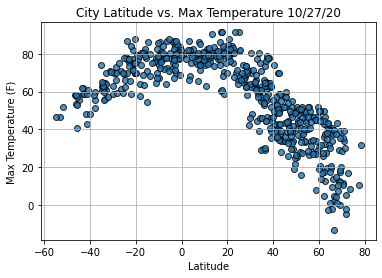

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

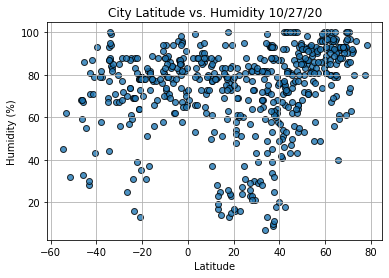

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

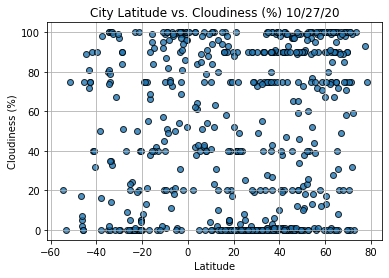

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

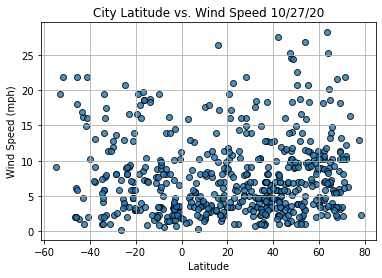

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()